In [122]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "synthetic-hr-burnout-dataset"

# **Table of Contents**
------------------
✅ **Load Libraries.**   
✅ **Data Load with EDA.**   
✅ **Data Transform.**   
✅ **Data Visulaization.**   
✅ **Prediction Modeling and ML.**   

# **1. Load Libraries.**

In [123]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

# **2. Data Load with EDA.**

In [124]:
df <- read.csv('/kaggle/input/synthetic-hr-burnout-dataset/synthetic_employee_burnout.csv') %>% janitor::clean_names() %>%
        mutate(across(
    c(
        where(is.character)
     ),
    ~as.factor(.x)
    ))

## **Data Description**
-----------------------
This dataset simulates employee-level data for burnout prediction and classification tasks.    
It can be used for binary classification, exploratory data analysis (EDA), and feature importance exploration.


* **Name** — Synthetic employee name (for realism, not for ML use).

* **Age** — Age of the employee.

* **Gender** — Male or Female.

* **JobRole** — Job type (Engineer, HR, Manager, etc.).

* **Experience** — Years of work experience.

* **WorkHoursPerWeek** — Average number of working hours per week.

* **RemoteRatio** — % of time spent working remotely (0–100).

* **SatisfactionLevel** — Self-reported satisfaction (1.0 to 5.0).

* **StressLevel** — Self-reported stress level (1 to 10).
  
* **Burnout** — Target variable. 1 if signs of burnout exist (high stress + low satisfaction + long hours), otherwise 0

[DataSet Check or Another Notebook](https://www.kaggle.com/datasets/ankam6010/synthetic-hr-burnout-dataset/data)

## **Summary**

In [125]:
glimpse(df)

Rows: 2,000
Columns: 10
$ name                <fct> Max Ivanov, Max Wang, Nina Petrov, John Ivanov, Jo…
$ age                 <int> 32, 40, 33, 35, 59, 45, 31, 39, 24, 22, 24, 55, 55…
$ gender              <fct> Male, Female, Female, Female, Male, Female, Male, …
$ job_role            <fct> Analyst, Engineer, Engineer, Manager, Sales, Sales…
$ experience          <int> 3, 9, 2, 6, 8, 11, 5, 17, 0, 1, 1, 11, 11, 26, 0, …
$ work_hours_per_week <int> 60, 47, 44, 44, 38, 44, 70, 31, 63, 30, 45, 59, 34…
$ remote_ratio        <int> 21, 67, 20, 70, 46, 90, 30, 53, 35, 5, 50, 14, 1, …
$ satisfaction_level  <dbl> 4.40, 2.09, 2.58, 3.23, 4.41, 4.31, 2.18, 3.95, 1.…
$ stress_level        <int> 1, 2, 3, 8, 1, 7, 3, 4, 5, 5, 10, 10, 2, 8, 3, 5, …
$ burnout             <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [126]:
summary(df)

         name           age           gender         job_role     experience   
 Max Wang  :  34   Min.   :22.00   Female: 977   Analyst :413   Min.   : 0.00  
 Lily Wang :  32   1st Qu.:31.00   Male  :1023   Engineer:386   1st Qu.: 3.00  
 Leo Wang  :  31   Median :41.00                 HR      :391   Median : 7.00  
 Max Ivanov:  30   Mean   :40.69                 Manager :419   Mean   :10.07  
 Sam Brown :  29   3rd Qu.:50.00                 Sales   :391   3rd Qu.:15.00  
 Ivan Wang :  28   Max.   :60.00                                Max.   :39.00  
 (Other)   :1816                                                               
 work_hours_per_week  remote_ratio    satisfaction_level  stress_level   
 Min.   :30.00       Min.   :  0.00   Min.   :1.000      Min.   : 1.000  
 1st Qu.:39.00       1st Qu.: 24.00   1st Qu.:2.000      1st Qu.: 3.000  
 Median :49.00       Median : 49.00   Median :3.025      Median : 5.000  
 Mean   :49.59       Mean   : 49.97   Mean   :2.995      Mean   

In [127]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
name*,1,2000,50.97750,28.9157925,51.000,51.106250,37.065000,1,100,99,-0.024669663,-1.2226759,0.646576776
age,2,2000,40.69450,11.2867562,41.000,40.614375,14.826000,22,60,38,0.035439083,-1.1995057,0.252379541
gender*,3,2000,1.51150,0.4999927,2.000,1.514375,0.000000,1,2,1,-0.045977667,-1.9988847,0.011180178
job_role*,4,2000,2.99450,1.4182650,3.000,2.993125,1.482600,1,5,4,-0.013434876,-1.3111134,0.031713369
experience,5,2000,10.07450,9.1482673,7.000,8.858125,7.413000,0,39,39,0.996619470,0.1651207,0.204561476
work_hours_per_week,6,2000,49.58800,11.8324241,49.000,49.485625,14.826000,30,70,40,0.056067484,-1.1861664,0.264581045
remote_ratio,7,2000,49.97300,29.1512979,49.000,49.896250,37.065000,0,100,100,0.029085553,-1.2032774,0.651842838
satisfaction_level,8,2000,2.99523,1.1554313,3.025,2.993900,1.490013,1,5,4,-0.008285516,-1.2029511,0.025836230
stress_level,9,2000,5.43200,2.8808898,5.000,5.430000,4.447800,1,10,9,0.002700589,-1.2445534,0.064418653


In [128]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             2000  
Number of columns          10    
_______________________          
Column type frequency:           
  factor                   3     
  numeric                  7     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 name                  0             1 FALSE        100
2 gender                0             1 FALSE          2
3 job_role              0             1 FALSE          5
  top_counts                           
1 Max: 34, Lil: 32, Leo: 31, Max: 30   
2 Mal: 1023, Fem: 977                  
3 Man: 419, Ana: 413, HR: 391, Sal: 391

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable       n_missing complete_rate    mean     sd p0 p25

## **Checking Missing Value & Duplicate Value**

In [129]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
name,0
age,0
gender,0
job_role,0
experience,0
work_hours_per_week,0
remote_ratio,0
satisfaction_level,0
stress_level,0


In [130]:
sum(duplicated(df))

[1] 0

In [131]:
head(df,3)

,name,age,gender,job_role,experience,work_hours_per_week,remote_ratio,satisfaction_level,stress_level,burnout
,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
2,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
3,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0


# **2. Data Transformation**

In [132]:
df <- df %>% rename(work_hour = work_hours_per_week ,
                    satisfaction = satisfaction_level)

In [133]:
df$burnout <- as.factor(df$burnout)

# **3. Data Visuazlization**

In [134]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor), -name) %>% colnames()
cat('num_cols :', num_cols,'\n')
cat('cat_cols :', cat_cols)

num_cols : age experience work_hour remote_ratio satisfaction stress_level 
cat_cols : gender job_role burnout

## **Histogram & Boxplot & Densityplot**

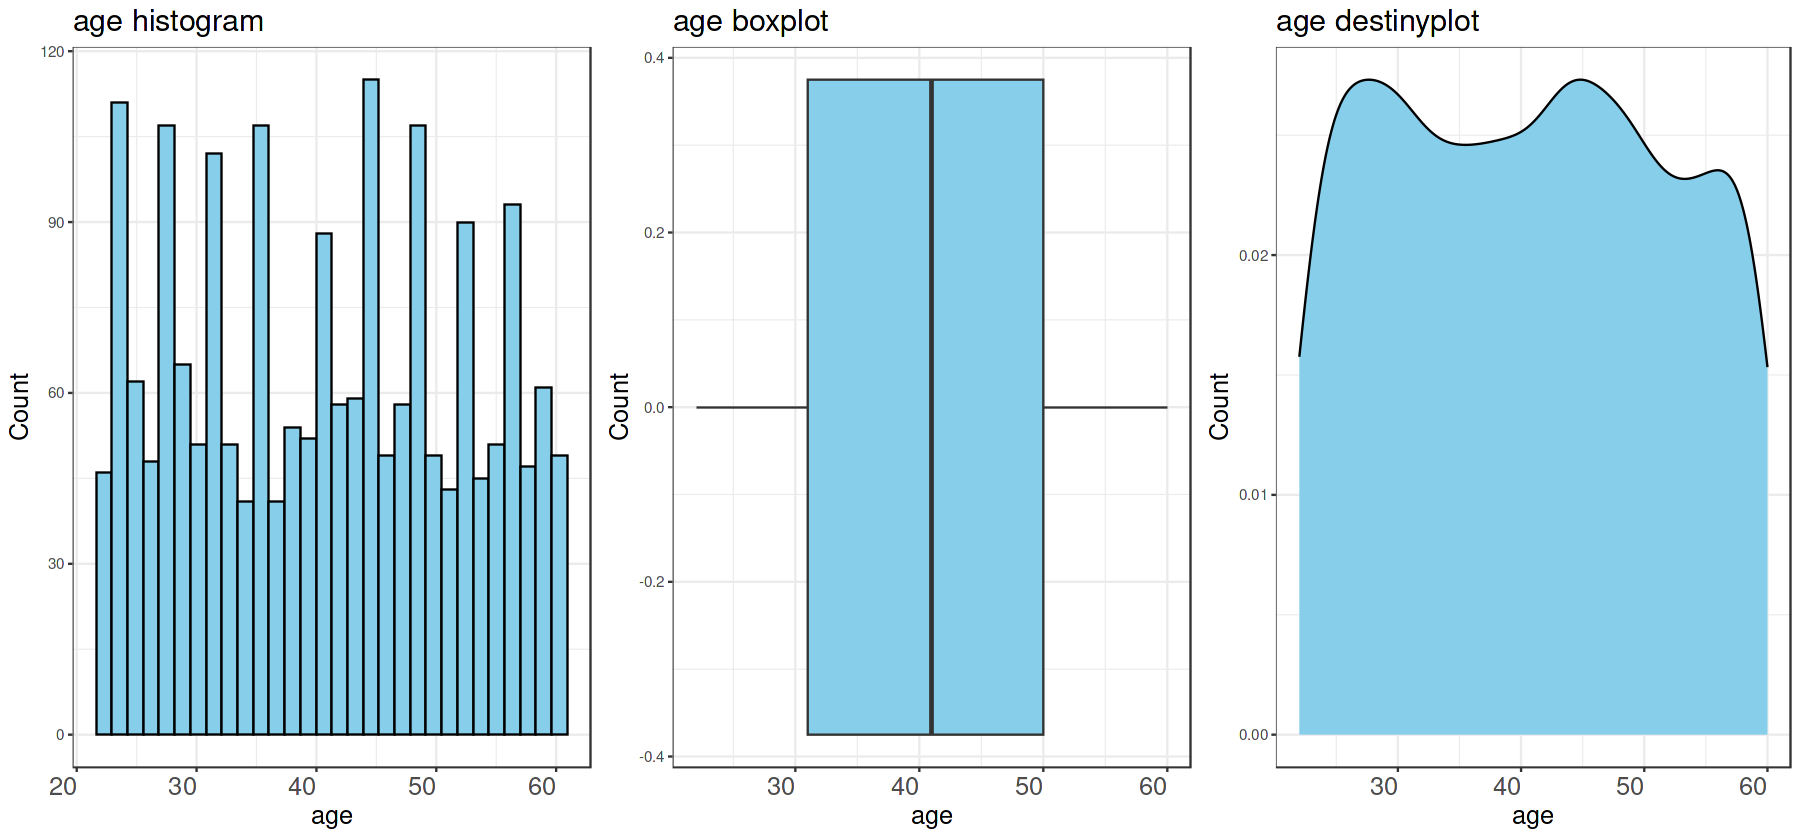

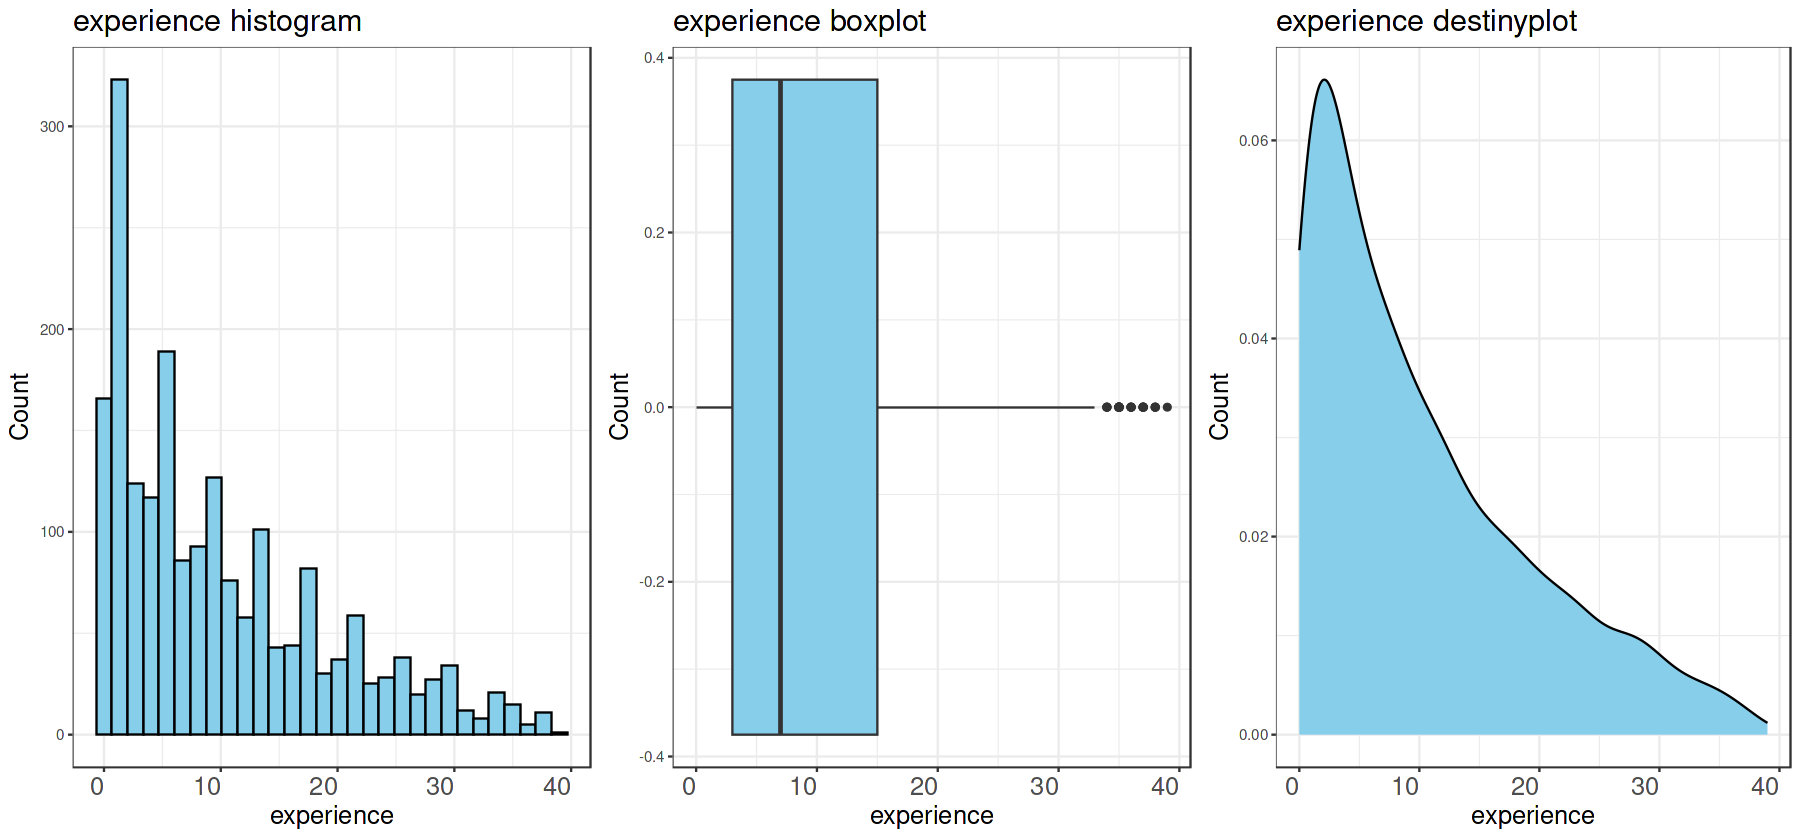

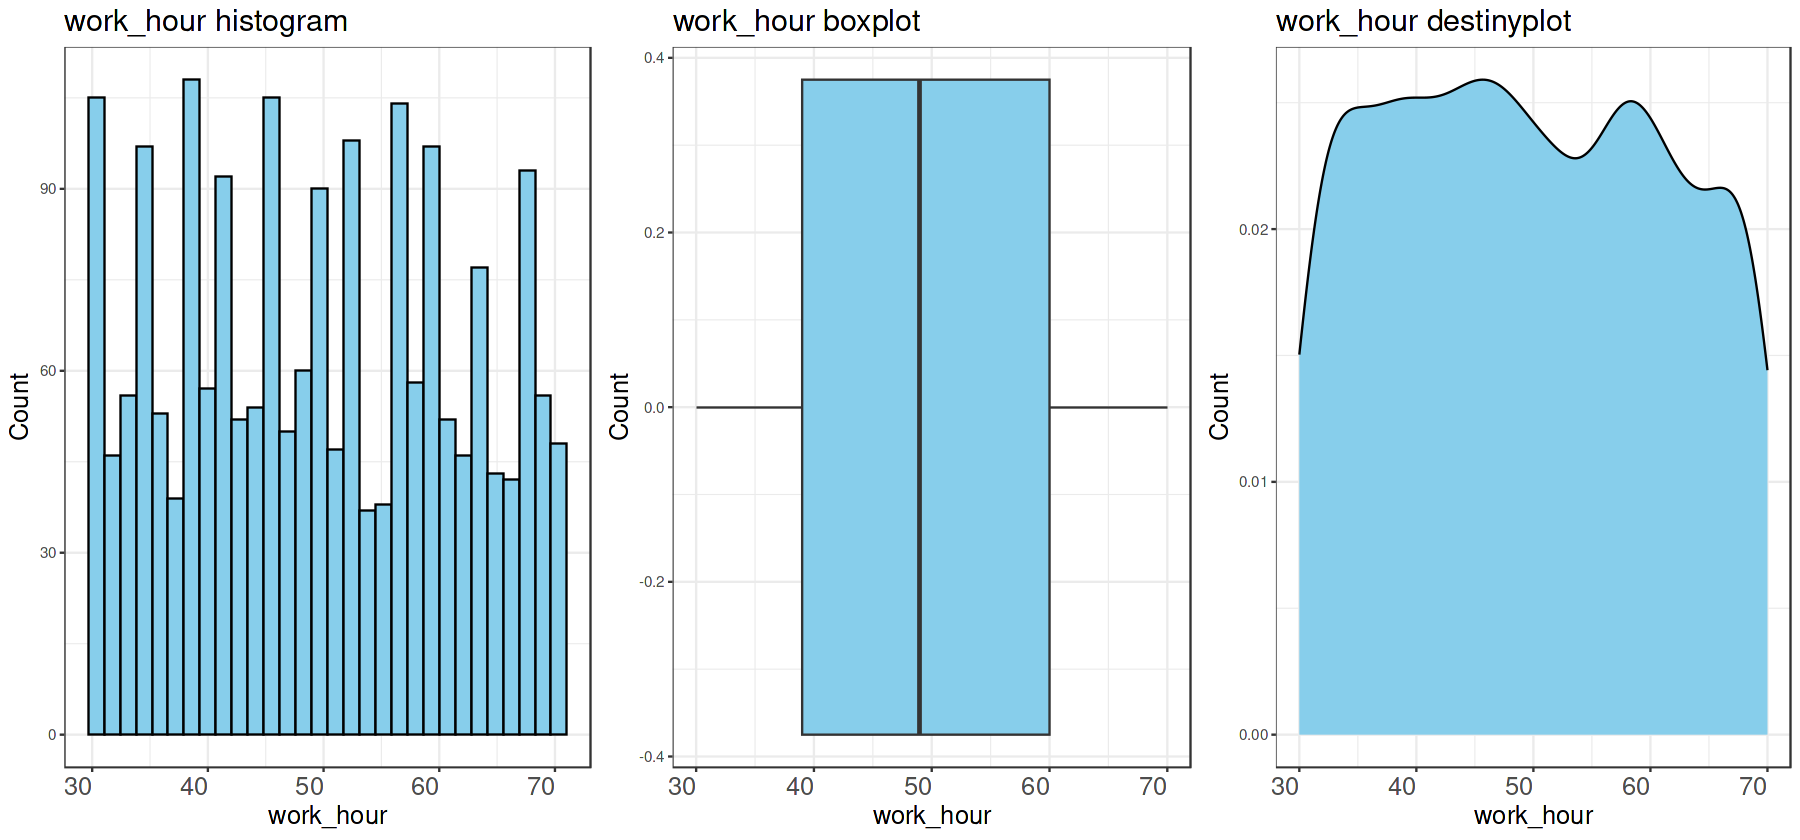

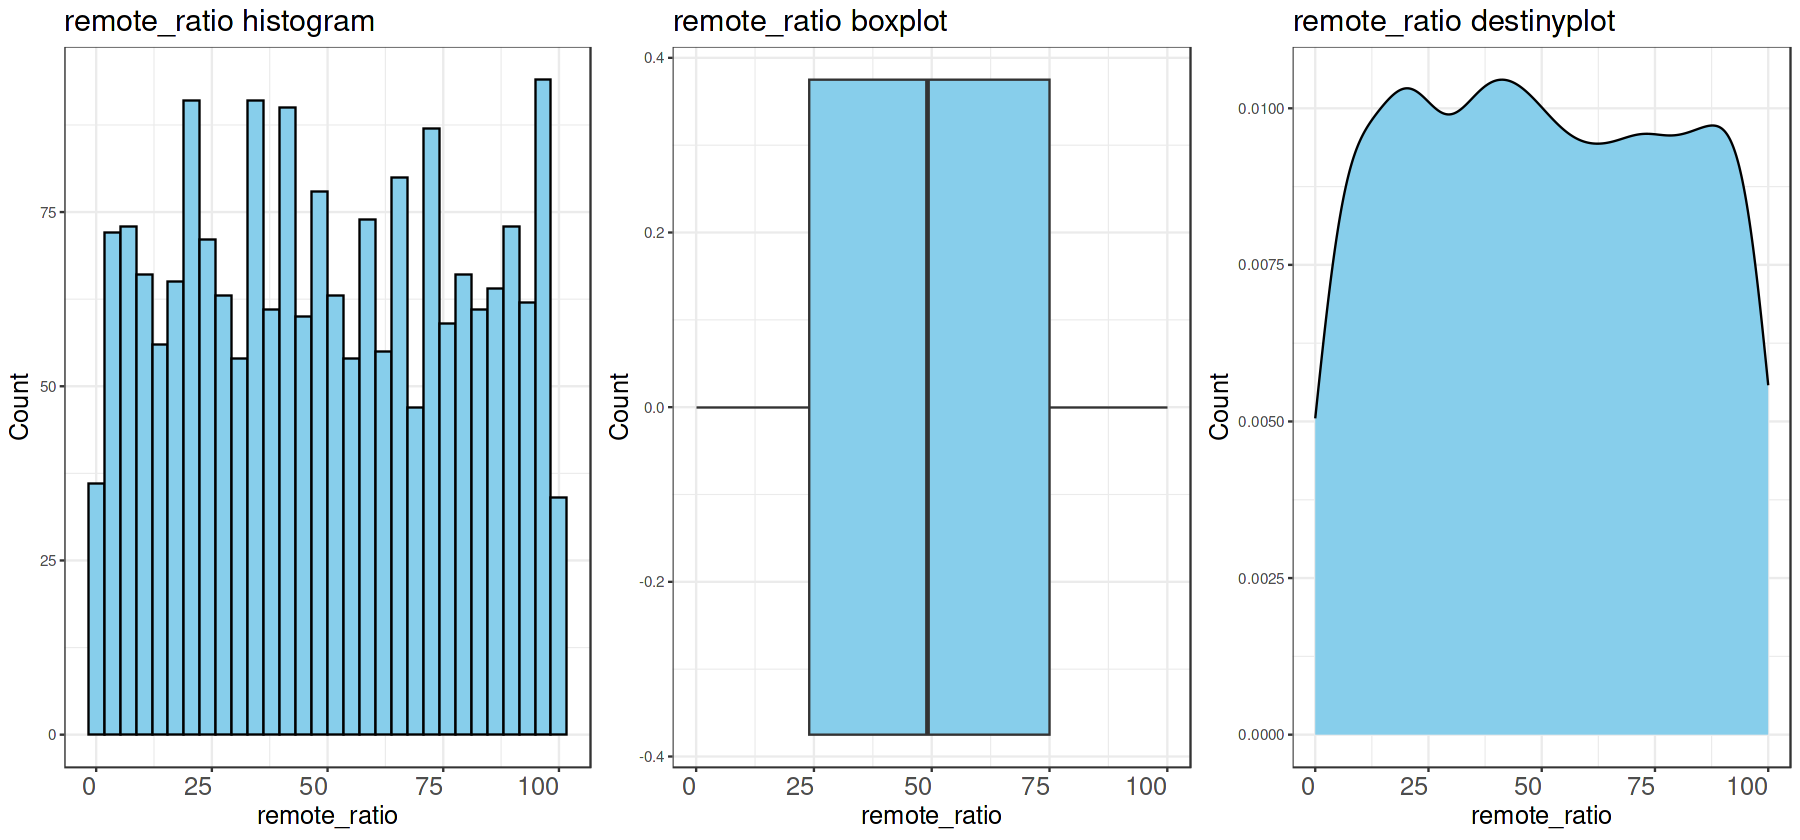

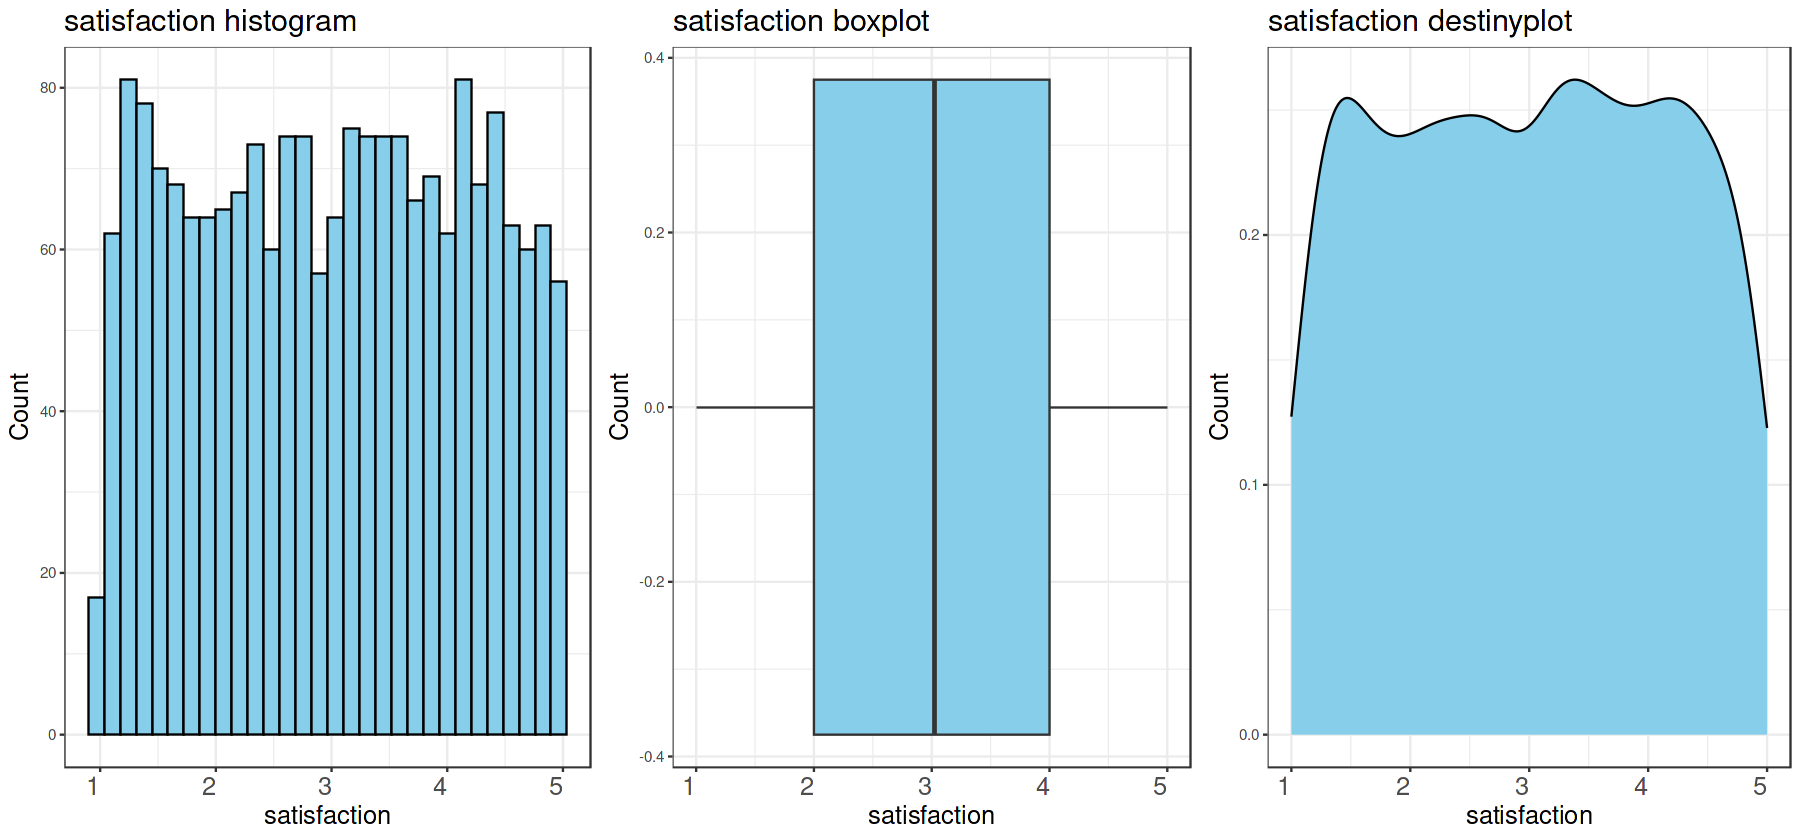

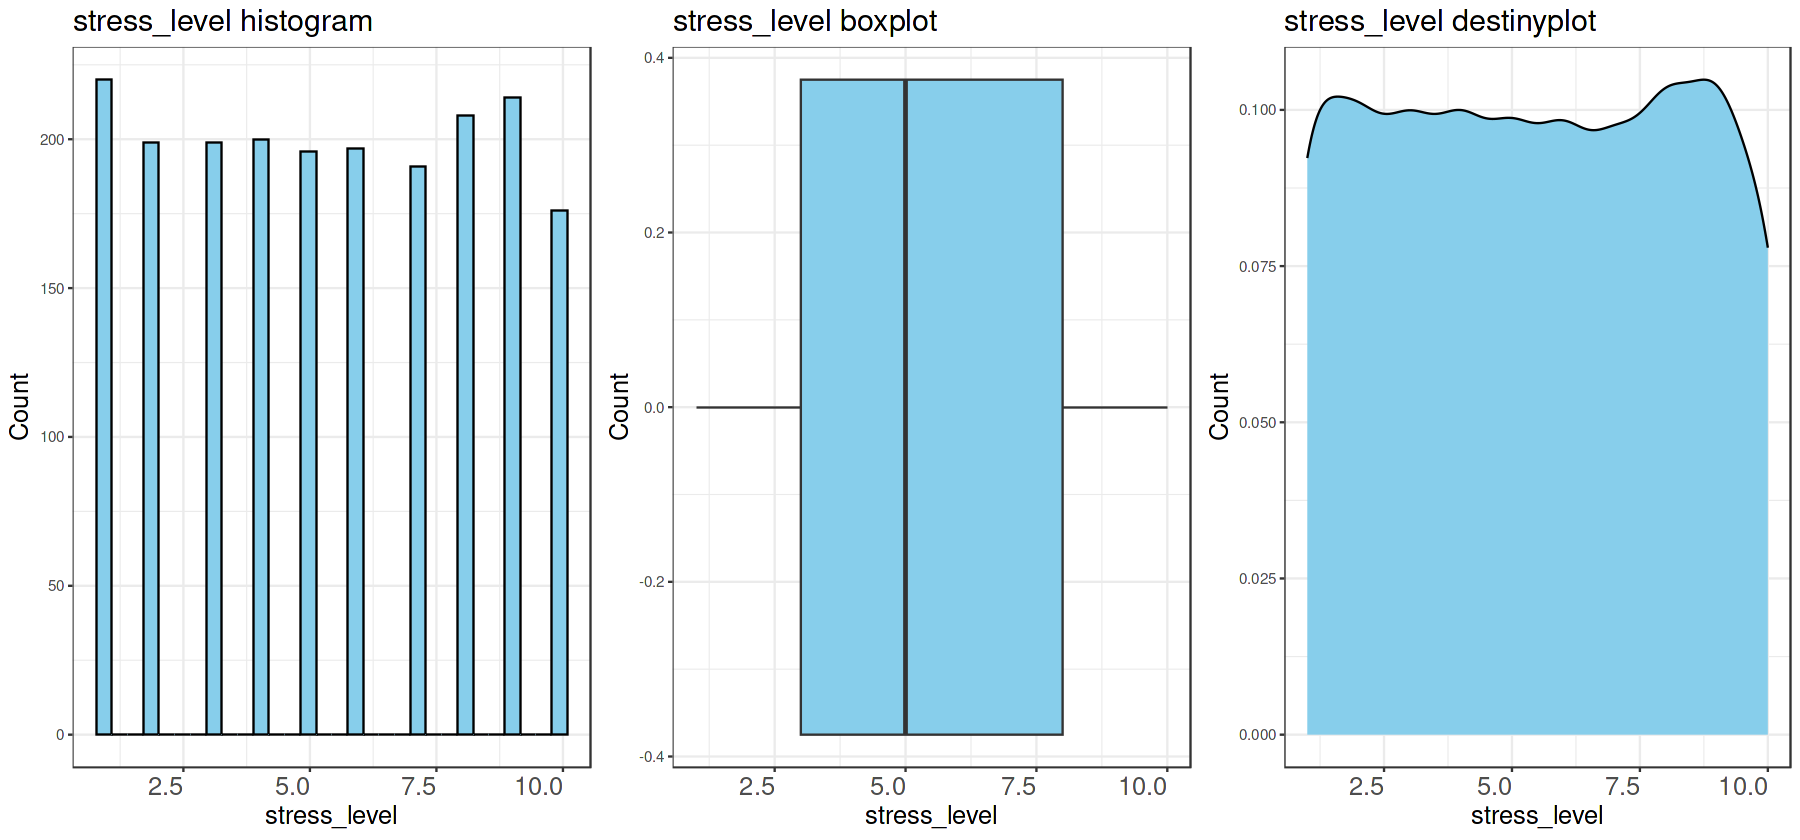

In [135]:
options(repr.plot.width = 15.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **CountPlot**

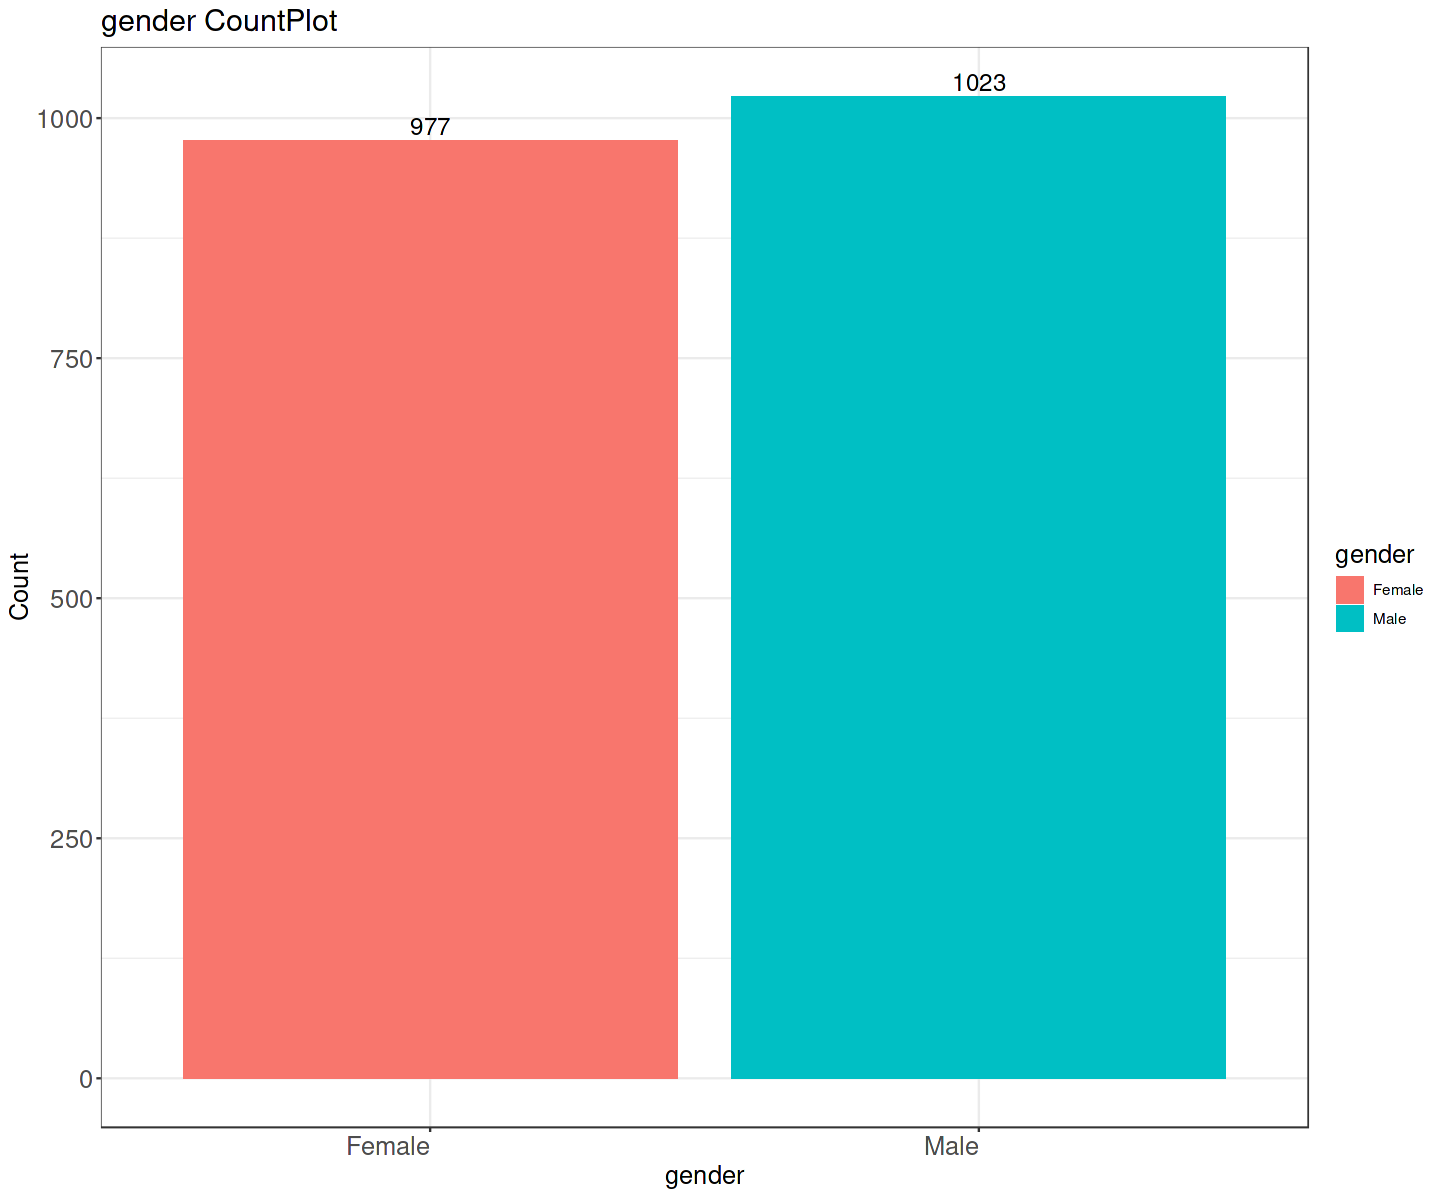

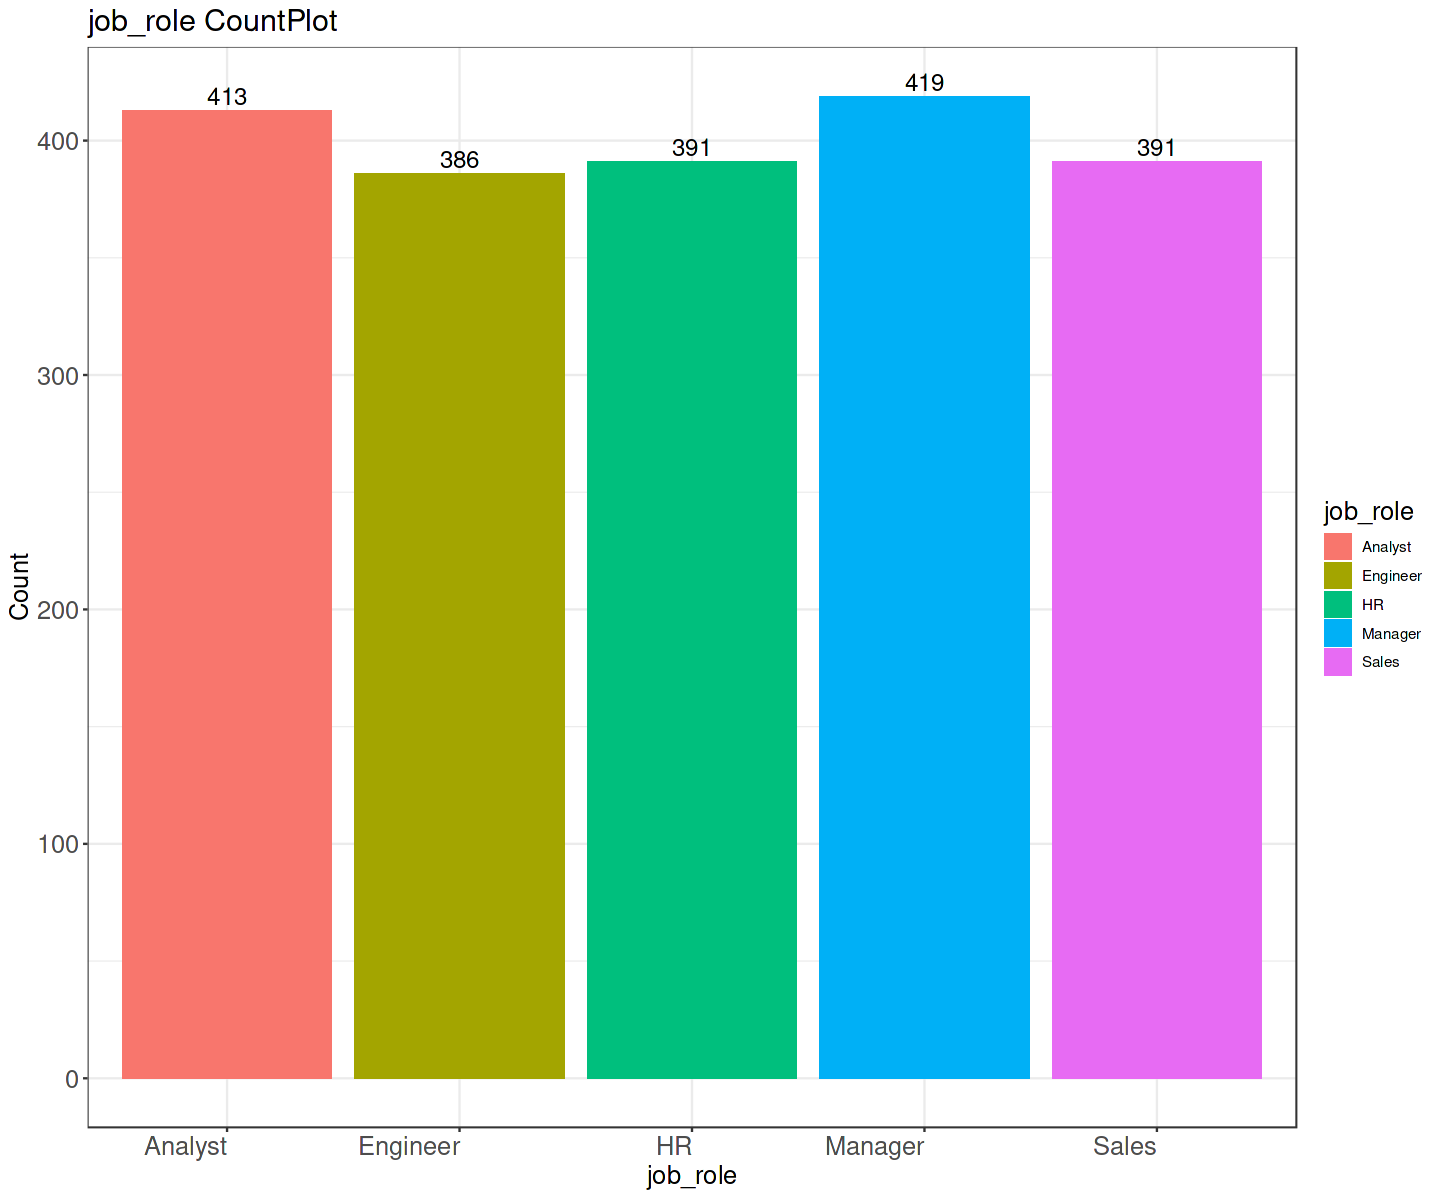

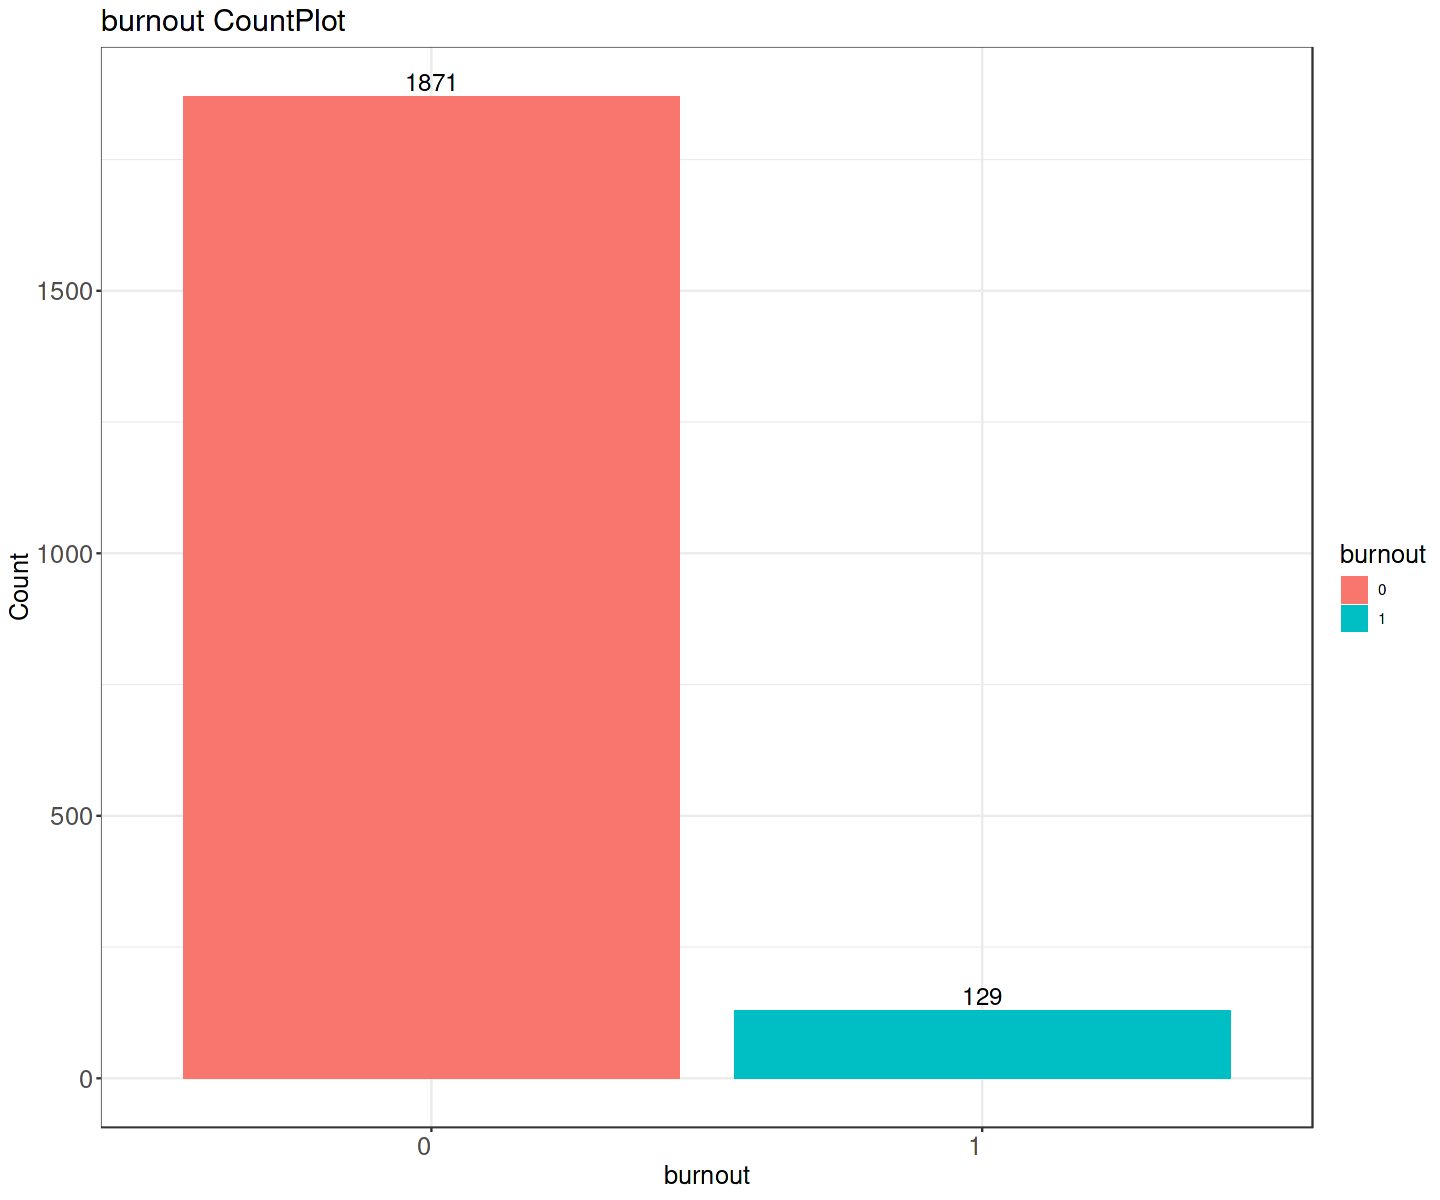

In [136]:
options(repr.plot.width = 12.0, repr.plot.height = 10.0)


for(i in cat_cols){
  col_name <- i  
  a <- ggplot(df) +
    geom_bar(aes(x = .data[[col_name]], fill = .data[[col_name]])) +
    geom_text(
      aes(x = .data[[col_name]], label = ..count..),
      stat = "count",
      vjust = -0.3,
      size = 5
    ) +
    labs(
      title = paste0(col_name, " CountPlot"),
      x = col_name,
      y = "Count",
      fill = col_name
    ) +
    theme_bw() +
    theme(
      axis.title = element_text(size = 15),
      axis.text.x = element_text(size = 15, hjust = 1),
      axis.text.y = element_text(size = 15, hjust = 1),
      title = element_text(size = 15)
    )
  
  grid.arrange(a, ncol = 1)
}

## **Correlation**

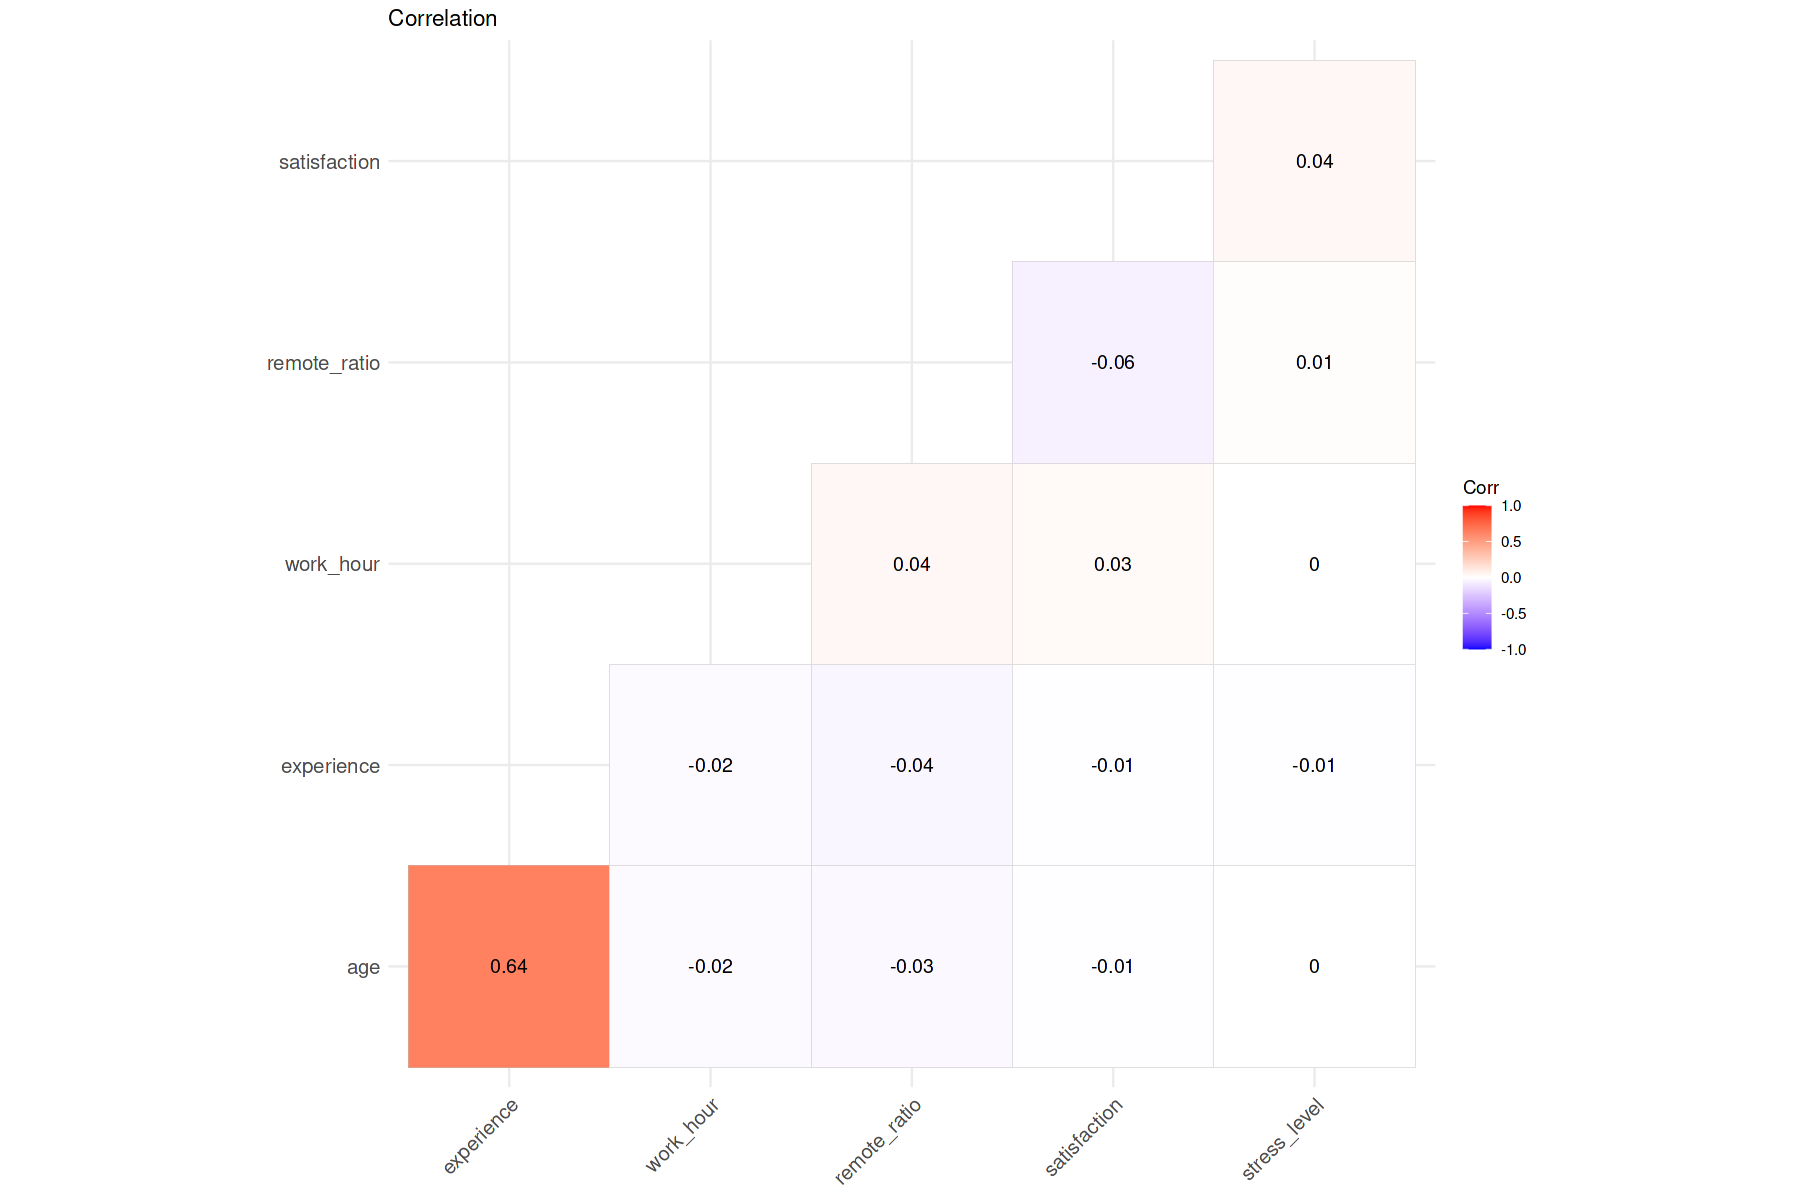

In [137]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

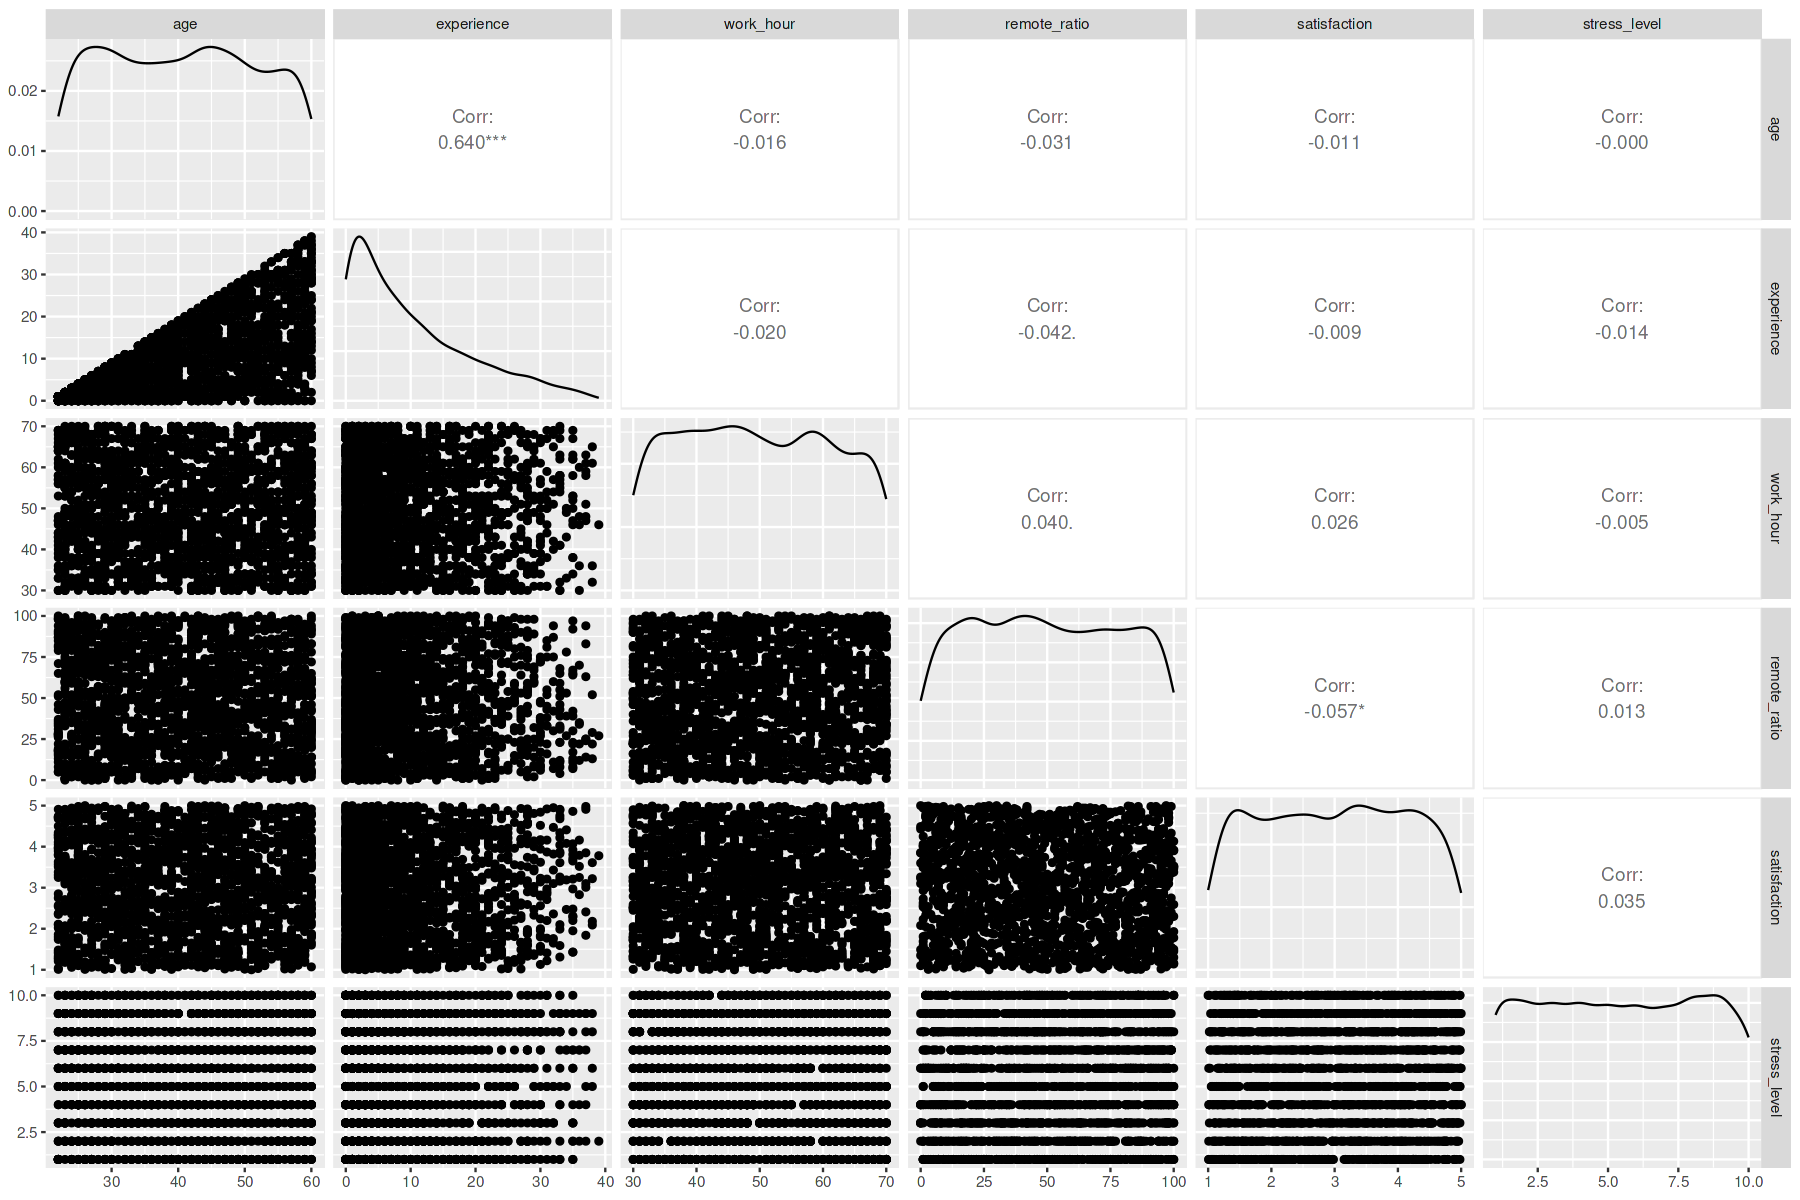

In [138]:
ggpairs(df[,num_cols])

# **4. Modeling**

In [139]:
library(caret)
library(Metrics)
library(smotefamily)

## **Preprocessing**

In [140]:
df <- df %>% select(-name)

### **LabelEncoder**

In [141]:
# It is encoded alphabetically. (ex. A -> 1, B - > 2 )

df$gender <- as.numeric(df$gender)
df$job_role <- as.numeric(df$job_role)

In [142]:
head(df)

,age,gender,job_role,experience,work_hour,remote_ratio,satisfaction,stress_level,burnout
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<fct>
1,32,2,1,3,60,21,4.40,1,0
2,40,1,2,9,47,67,2.09,2,0
3,33,1,2,2,44,20,2.58,3,0
4,35,1,4,6,44,70,3.23,8,0
5,59,2,5,8,38,46,4.41,1,0
6,45,1,5,11,44,90,4.31,7,0


### **SMOTE(Over Sampling)**

In [143]:
smote_result <- SMOTE(X = df[, -9], target = df$burnout, 
                      K = 5, dup_size = 10)

In [144]:
df_smote <- data.frame(smote_result$data)
names(df_smote)[ncol(df_smote)] <- "burnout"
df_smote$burnout <- as.factor(df_smote$burnout)

In [145]:
table(df_smote$burnout)


   0    1 
1871 1419 

In [146]:
head(df_smote)

,age,gender,job_role,experience,work_hour,remote_ratio,satisfaction,stress_level,burnout
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,40,2,2,14,56,64,1.57,9,1
2,55,1,4,22,70,17,2.74,10,1
3,45,1,1,3,59,95,1.19,8,1
4,33,1,1,9,62,4,1.35,9,1
5,28,2,4,4,69,14,2.26,8,1
6,60,2,1,19,60,35,2.50,8,1


## **Train Test Split**

In [147]:
split <- rsample::initial_split(df_smote, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **5FOLD**

In [148]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = burnout)

## **Recipe**

In [149]:
rec <- recipe(burnout ~ ., data = train) %>%
    step_normalize(all_numeric_predictors()) %>%
    step_YeoJohnson(all_numeric_predictors()) %>%
    step_zv(all_predictors())

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 8



── Operations 

• Centering and scaling for: all_numeric_predictors()

• Yeo-Johnson transformation on: all_numeric_predictors()

• Zero variance filter on: all_predictors()



## **ML**

In [150]:
# XGBoost

xgb_spec <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

In [151]:
xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_normalize()
• step_YeoJohnson()
• step_zv()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [152]:
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

### **XGBoost Parameters**

In [153]:
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

### **Tune**

In [154]:
xgb_res <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(yardstick::accuracy),
  param_info = params
)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/4

✓ Fold1: preprocessor 1/1, model 1/4

i Fold1: preprocessor 1/1, model 1/4 (extracts)

i Fold1: preprocessor 1/1, model 1/4 (predictions)

i Fold1: preprocessor 1/1, model 2/4

✓ Fold1: preprocessor 1/1, model 2/4

i Fold1: preprocessor 1/1, model 2/4 (extracts)

i Fold1: preprocessor 1/1, model 2/4 (predictions)

i Fold1: preprocessor 1/1, model 3/4

✓ Fold1: preprocessor 1/1, model 3/4

i Fold1: preprocessor 1/1, model 3/4 (extracts)

i Fold1: preprocessor 1/1, model 3/4 (predictions)

i Fold1: preprocessor 1/1, model 4/4

✓ Fold1: preprocessor 1/1, model 4/4

i Fold1: preprocessor 1/1, model 4/4 (extracts)

i Fold1: preprocessor 1/1, model 4/4 (predictions)

i Fold2: preprocessor 1/1

✓ Fold2: preprocessor 1/1

i Fold2: preprocessor 1/1, model 1/4

✓ Fold2: preprocessor 1/1, model 1/4

i Fold2: preprocessor 1/1, model 1/4 (extracts)

i Fold2: preprocessor 1/1, model 1/4 (predictions)

i Fold2

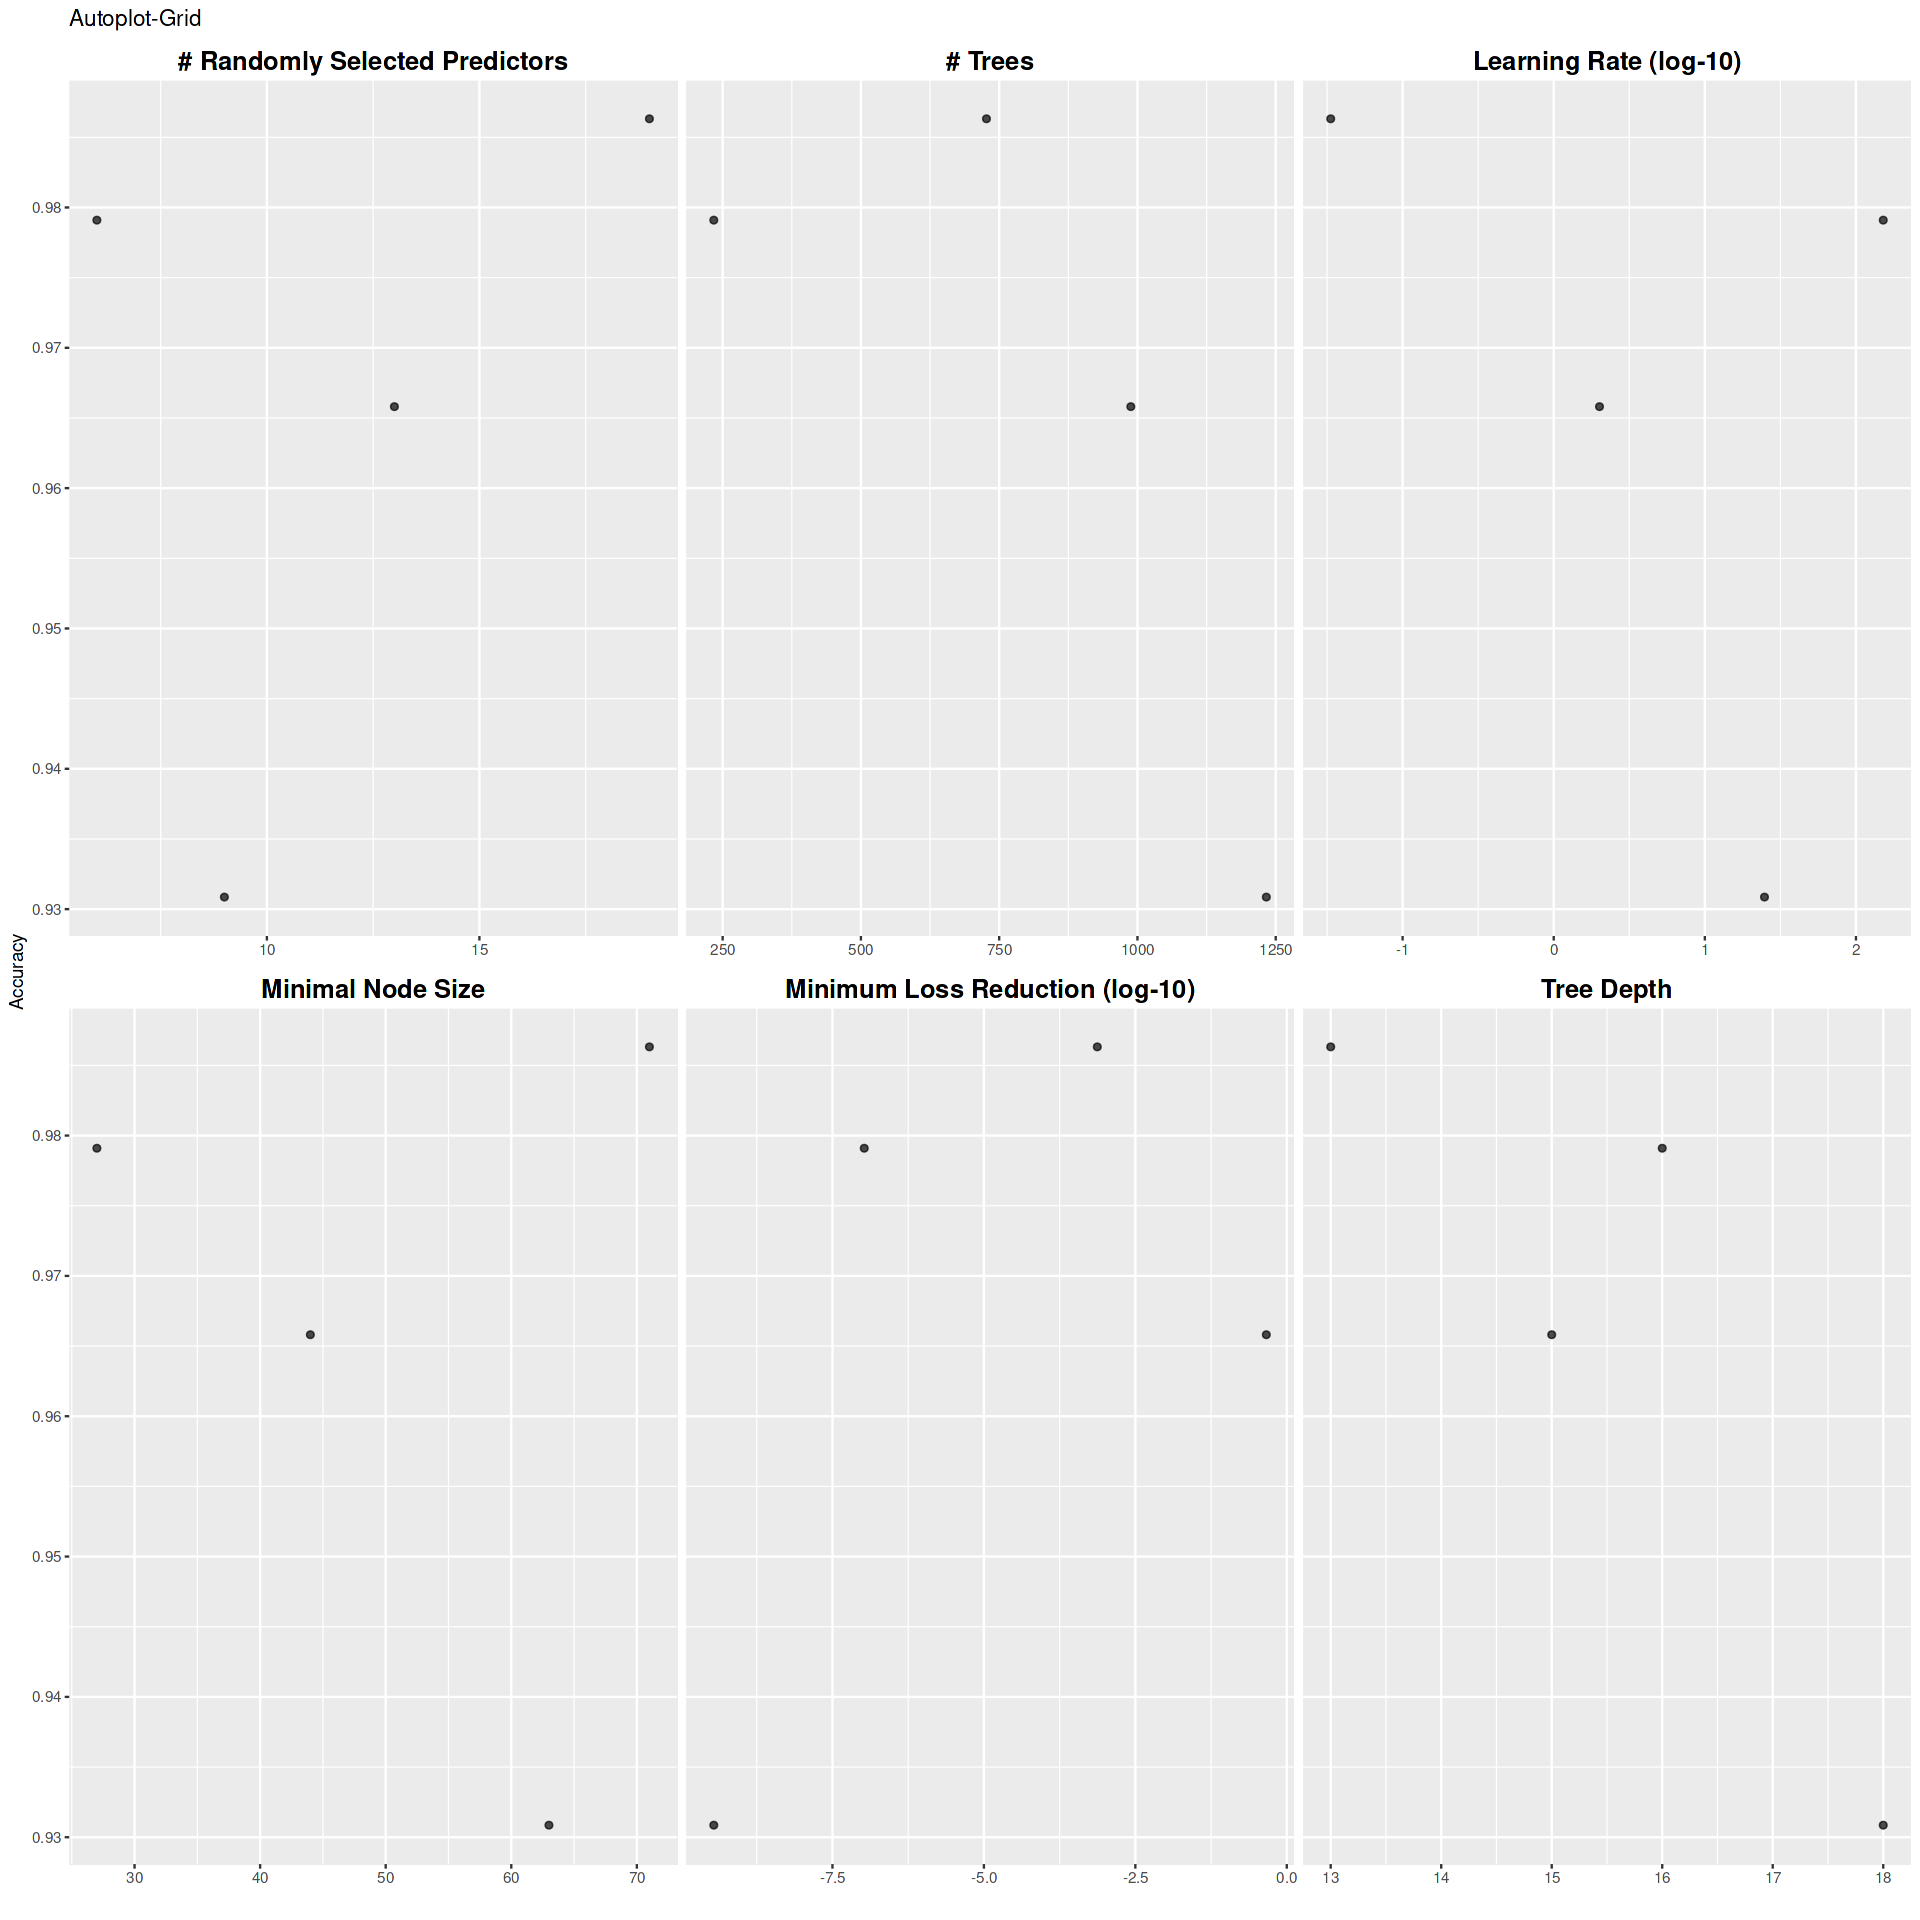

In [155]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [156]:
xgb_best <- select_best(xgb_res, metric = "accuracy")
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
19,727,71,13,0.03343457,0.0007443321,Preprocessor1_Model4


In [157]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_normalize()
• step_YeoJohnson()
• step_zv()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = 19
  trees = 727
  min_n = 71
  tree_depth = 13
  learn_rate = 0.0334345672139857
  loss_reduction = 0.000744332074477942

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [158]:
final_fit <- xgb_wf %>%
  finalize_workflow(select_best(xgb_res, metric = "accuracy")) %>%
  fit(train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_normalize()
• step_YeoJohnson()
• step_zv()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 549.9 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.0334345672139857, max_depth = 13L, 
    gamma = 0.000744332074477942, colsample_bytree = 1, colsample_bynode = 1, 
    min_child_weight = 71L, subsample = 1), data = x$data, nrounds = 727L, 
    watchlist = x$watchlist, verbose = 0, nthread = c(system = 4), 
    objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.0334345672139857", max_depth = "13", gamma = "0.000744332074477942", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "71", subsample = "1", nthread = "4", objective = "binary:logistic", validate_parameters =

In [159]:
xgb_pred <- predict(final_fit, new_data = test, type = 'class')

### **Evaluation**

In [161]:
xgb_pred <- as.data.frame(xgb_pred)
cm_xgb <- confusionMatrix(xgb_pred$.pred_class, test$burnout)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 379  11
         1   0 268
                                          
               Accuracy : 0.9833          
                 95% CI : (0.9703, 0.9916)
    No Information Rate : 0.576           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9656          
                                          
 Mcnemar's Test P-Value : 0.002569        
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9606          
         Pos Pred Value : 0.9718          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5760          
         Detection Rate : 0.5760          
   Detection Prevalence : 0.5927          
      Balanced Accuracy : 0.9803          
                                          
       'Positive' Class : 0               
                              

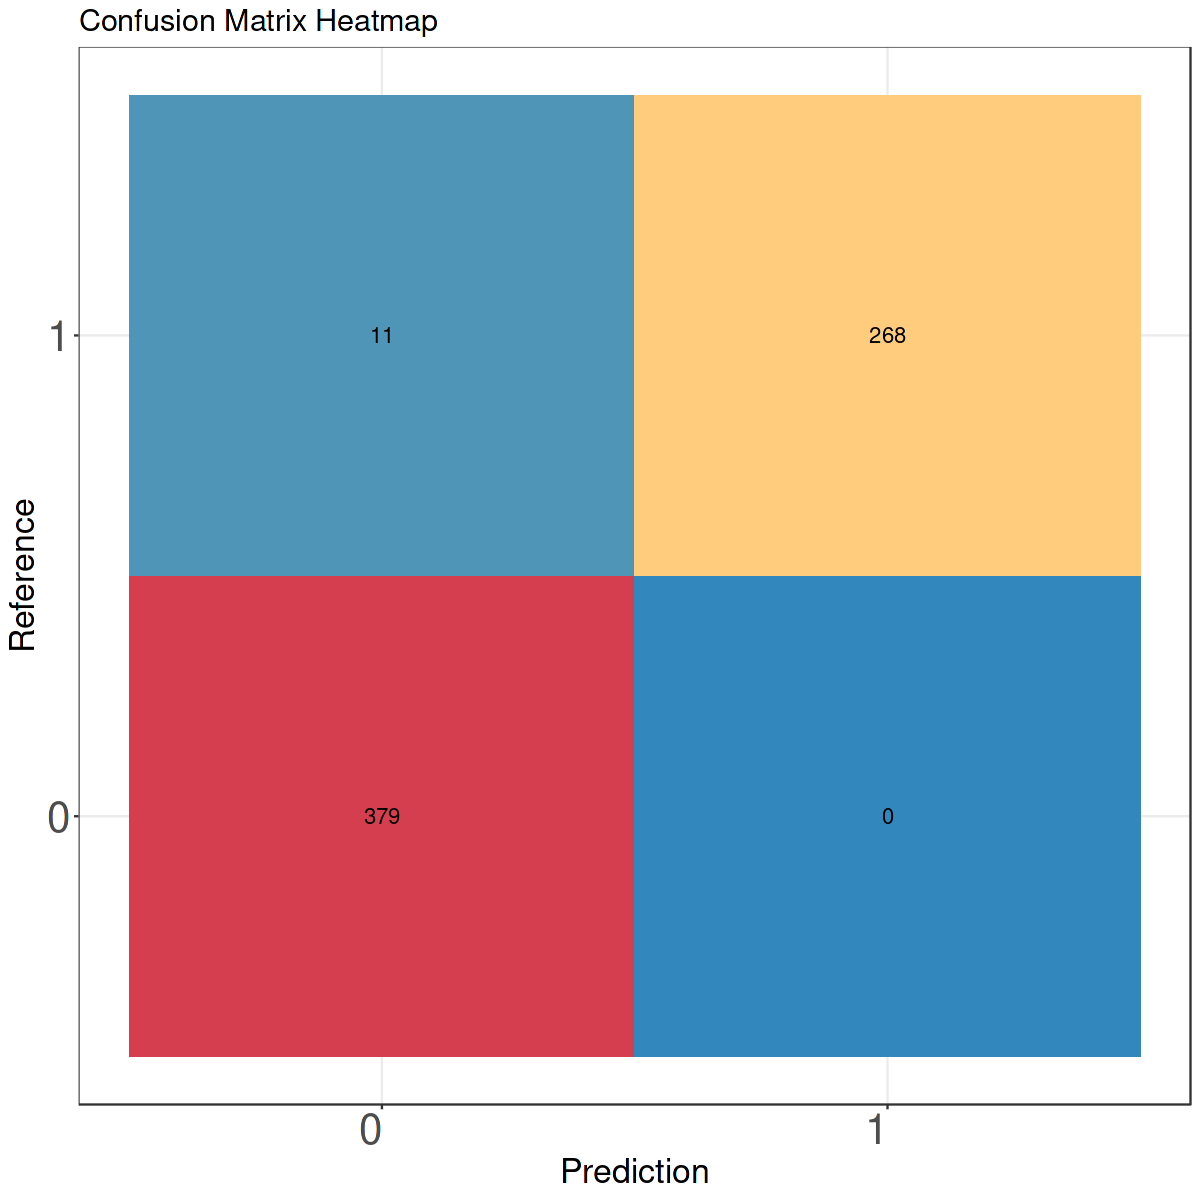

In [162]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
xgb_heatmap <- data.frame(cm_xgb$table)

ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

**Thankyou. Please leave your advice in the comments**